<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/epileptic_seizure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
from  tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [7]:
uploads=files.upload()


Saving epileptic.csv to epileptic.csv


In [8]:
df= pd.read_csv(io.BytesIO(uploads['epileptic.csv']),encoding='windows-1252')
#df= pd.read_csv('epileptic.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1151 non-null   int64  
 1   b            1151 non-null   int64  
 2   abnormality  1151 non-null   int64  
 3   mas          1151 non-null   int64  
 4   c            1151 non-null   int64  
 5   d            1151 non-null   int64  
 6   e            1151 non-null   int64  
 7   f            1151 non-null   int64  
 8   g            1151 non-null   int64  
 9    exudates    1151 non-null   float64
 10  i            1151 non-null   float64
 11  j            1151 non-null   float64
 12  k            1151 non-null   float64
 13  l            1151 non-null   float64
 14  m            1151 non-null   float64
 15  n            1151 non-null   float64
 16  o            1151 non-null   float64
 17  p            1151 non-null   float64
 18  q            1151 non-null   float64
 19  r     

,id,b,abnormality,mas,c,d,e,f,g,exudates,i,j,k,l,m,n,o,p,q,r,y
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


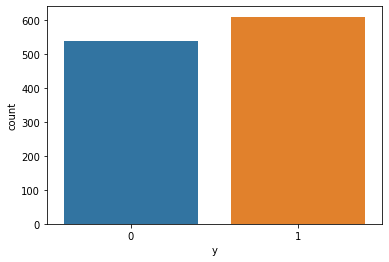

In [9]:
sns.countplot(df['y'],label='epileptic')


In [10]:
print(df.info)

<bound method DataFrame.info of         id  b  abnormality  mas   c  ...         o         p         q  r  y
0        1  1            1   22  22  ...  0.003923  0.486903  0.100025  1  0
1        2  1            1   24  24  ...  0.003903  0.520908  0.144414  0  0
2        3  1            1   62  60  ...  0.007744  0.530904  0.128548  0  1
3        4  1            1   55  53  ...  0.001531  0.483284  0.114790  0  0
4        5  1            1   44  44  ...  0.000000  0.475935  0.123572  0  1
...    ... ..          ...  ...  ..  ...       ...       ...       ... .. ..
1146  1147  1            1   34  34  ...  0.000000  0.537470  0.116795  0  0
1147  1148  1            1   49  49  ...  0.000000  0.516733  0.124190  0  0
1148  1149  1            0   49  48  ...  0.000000  0.560632  0.129843  0  0
1149  1150  1            1   39  36  ...  0.174584  0.485972  0.106690  1  1
1150  1151  1            1    7   7  ...  0.000000  0.556192  0.088957  0  0

[1151 rows x 21 columns]>


In [11]:
x=df.iloc[:,1:20]  
y=df.iloc[:,20]


In [12]:
#scaling data
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,test_size=20)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_tst=sc.fit_transform(x_tst)


In [13]:
#defining function for model build
def model_classifier():
  model=Sequential()
  model.add(Dense(units=25,activation='relu',input_dim=19))
  model.add(Dense(units=25,activation='relu'))
  #,activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 
  return model 

In [56]:
#kfold classification score estimation
classifier=KerasClassifier(build_fn=model_classifier,epochs=1000,batch_size=120)
score=cross_val_score(estimator=classifier,X=x_tr,y=y_tr,cv=10,n_jobs=-1)
print('scores =',score)
print(' mean score =',score.mean())
print('std score =',score.std())

scores = [0.82456142 0.71681416 0.71681416 0.61946905 0.76991153 0.64601767
 0.71681416 0.77876109 0.65486723 0.76991153]
 mean score = 0.7213941991329194
std score = 0.0626110394742664


In [16]:
#hyper parameter tunning
def model_classifier1(optimizer='adam'):
  model=Sequential()
  model.add(Dense(units=25,activation='relu',input_dim=19))
  model.add(Dense(units=25,activation='relu'))
  #,activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy']) 
  return model 
classifier1=KerasClassifier(build_fn=model_classifier1)
parameters={'optimizer':['adam','rms','adagrad'],
           'batch_size':[80,100,150],
           'epochs':[200,500,800]}
gridsearch=GridSearchCV(estimator=classifier1,param_grid=parameters,scoring='accuracy',cv=6)
gridsearch.fit(x_tr,y_tr)
best_parameters=gridsearch.best_params_
best_accuracy=gridsearch.best_score_
print('best parameters= ',best_parameters)
print('best accuracy = ',best_accuracy)


Epoch 1/200
12/12 [==============================] - 3s 3ms/step - loss: 0.6866 - accuracy: 0.5796
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6200
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6454
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.6635
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6614
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6699
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6773
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6794
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.6879
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.6911
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.4820
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5499
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5786
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.5977
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6093
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6242
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6380
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6507
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.6507
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.6667
Epoch 11/200
12/12 [=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown optimizer: rms. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
Epoch 702/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.6681
Epoch 703/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.6681
Epoch 704/800
7/7 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6681
Epoch 705/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.6681
Epoch 706/800
7/7 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6681
Epoch 707/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6691
Epoch 708/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6087 - accuracy: 0.6681
Epoch 709/800
7/7 [==============================] - 0s 5ms/step - loss: 0.6087 - accuracy: 0.6681
Epoch 710/800
7/7 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.6681
Epoch 711/800
7/7 [==============================] - 0s 5m

In [70]:
#hyperparameter tuning
best parameters=  {'batch_size': 80, 'epochs': 800, 'optimizer': 'adam'}
best accuracy =  0.7435785582948703

NameError: ignored

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat=confusion_matrix(y_tst,y_pred)
print(conf_mat)
conf_mat1=confusion_matrix(y_tr,y_trpred)
print(conf_mat1)

[[11  3]
 [ 4 12]]
[[489  37]
 [130 465]]


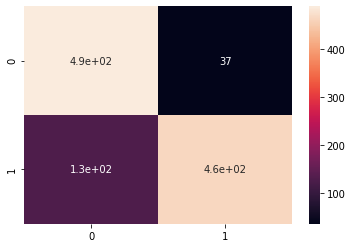

In [19]:
sns.heatmap(conf_mat1,annot=True)
plt.savefig('epilepticmatrix.png')

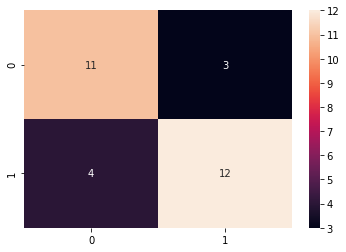

In [20]:
sns.heatmap(conf_mat,annot=True)
plt.savefig('epilepticmatrix1.png')

In [21]:
report=classification_report(y_tr,y_trpred)
print('Classification report for trained data')
print(report)
print('classification report for test data')
report=classification_report(y_tst,y_pred)
print(report)

Classification report for trained data
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       526
           1       0.93      0.78      0.85       595

    accuracy                           0.85      1121
   macro avg       0.86      0.86      0.85      1121
weighted avg       0.86      0.85      0.85      1121

classification report for test data
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.80      0.75      0.77        16

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30

